In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

In [2]:
# Read data
header_rows = 0
data1 = pd.read_csv('data/snl1.csv', skiprows=header_rows)
data2 = pd.read_csv('data/squ1.csv', skiprows=header_rows)
data3 = pd.read_csv('data/antisqu1.csv', skiprows=header_rows)

signal1 = data1.iloc[:, 0].values
signal2 = data2.iloc[:, 0].values
signal3 = data3.iloc[:, 0].values

min_length = min(len(signal1), len(signal2), len(signal3))
signal1 = signal1[:min_length]
signal2 = signal2[:min_length]
signal3 = signal3[:min_length]

In [3]:
# Parameters
split_num = 10 # also is average number
window_seg_number = 200 # number of segments in each window
sampling_rate = 10000000 # 10MSa/s
zohms = 50

split_size = len(signal1) // split_num
signal1_split = np.array_split(signal1[:split_size*split_num], split_num)
signal2_split = np.array_split(signal2[:split_size*split_num], split_num)
signal3_split = np.array_split(signal3[:split_size*split_num], split_num)

# Welch's method for signal1
Pxx_avg_seg1 = []
for i in range(split_num):
    f1, Pxx_avg_seg1_ = welch(signal1_split[i], fs=sampling_rate, window='boxcar', nperseg=len(signal1_split[i])//window_seg_number, noverlap=None, scaling='spectrum')
    """
    window can be one of the following:
        - boxcar
        - triang
        - blackman
        - hamming
        - hann
        - bartlett
        - flattop
        - parzen
        - bohman
        - blackmanharris
        - nuttall
        - barthann
        - cosine
        - exponential
        - tukey
        - taylor
        - lanczos
    When window is boxcar, window_seg_number is 1, and noverlap is None, the result is equivalent to `scipy.signal.periodogram`.
    """
    Pxx_avg_seg1.append(Pxx_avg_seg1_)
Pxx_avg1 = np.mean(Pxx_avg_seg1, axis=0)
Pxx_avg1 = 10 * np.log10(Pxx_avg1 / zohms) + 30

# Welch's method for signal2
Pxx_avg_seg2 = []
for i in range(split_num):
    f2, Pxx_avg_seg2_ = welch(signal2_split[i], fs=sampling_rate, window='boxcar', nperseg=len(signal2_split[i])//window_seg_number, noverlap=None, scaling='spectrum')
    Pxx_avg_seg2.append(Pxx_avg_seg2_)
Pxx_avg2 = np.mean(Pxx_avg_seg2, axis=0)
Pxx_avg2 = 10 * np.log10(Pxx_avg2 / zohms) + 30

# Welch's method for signal3
Pxx_avg_seg3 = []
for i in range(split_num):
    f3, Pxx_avg_seg3_ = welch(signal3_split[i], fs=sampling_rate, window='boxcar', nperseg=len(signal3_split[i])//window_seg_number, noverlap=None, scaling='spectrum')
    Pxx_avg_seg3.append(Pxx_avg_seg3_)
Pxx_avg3 = np.mean(Pxx_avg_seg3, axis=0)
Pxx_avg3 = 10 * np.log10(Pxx_avg3 / zohms) + 30


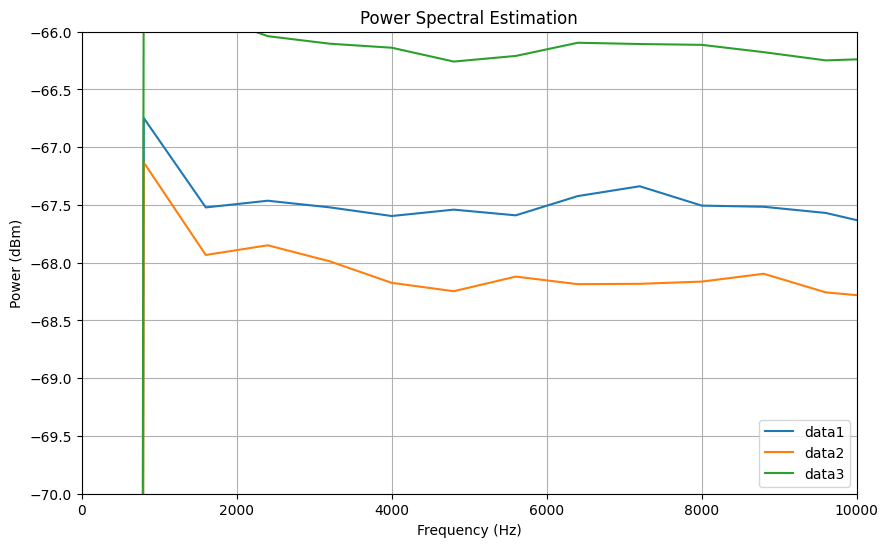

In [4]:
# Plot
yrange = 4
yref = -68
plt.figure(figsize=(10, 6))
plt.plot(f1, Pxx_avg1, label='data1')
plt.plot(f2, Pxx_avg2, label='data2')
plt.plot(f3, Pxx_avg3, label='data3')
plt.title('Power Spectral Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBm)')
plt.xlim(0,10000)
plt.ylim(yref-yrange/2, yref+yrange/2)
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# Moving average for downsampling rate
window_size = 10
signal1_slice4down = signal1[:len(signal1) - len(signal1)%window_size]
signal2_slice4down = signal2[:len(signal2) - len(signal2)%window_size]
signal3_slice4down = signal3[:len(signal3) - len(signal3)%window_size]
signal1_down = np.mean(signal1.reshape(-1, window_size), axis=1)
signal2_down = np.mean(signal2.reshape(-1, window_size), axis=1)
signal3_down = np.mean(signal3.reshape(-1, window_size), axis=1)


In [125]:
# Parameters for downsampled signal
split_num_down = 10 # also is average number
window_seg_number_down = 200 # number of segments in each window
sampling_rate_down = sampling_rate/window_size 

split_size_down = len(signal1_down) // split_num_down
signal1_down_split = np.array_split(signal1[:split_size_down*split_num_down], split_num_down)
signal2_down_split = np.array_split(signal2[:split_size_down*split_num_down], split_num_down)
signal3_down_split = np.array_split(signal3[:split_size_down*split_num_down], split_num_down)

# Welch's method for signal1_down
Pxx_avg_seg1_down = []
for i in range(split_num_down):
    f1_down, Pxx_avg_seg1_down_ = welch(signal1_down_split[i], fs=sampling_rate_down, window='boxcar', nperseg=len(signal1_down_split[i])//window_seg_number_down, noverlap=None, scaling='spectrum')
    Pxx_avg_seg1_down.append(Pxx_avg_seg1_down_)
Pxx_avg1_down = np.mean(Pxx_avg_seg1_down, axis=0)
Pxx_avg1_down = 10 * np.log10(Pxx_avg1_down / zohms) + 30

# Welch's method for signal2_down
Pxx_avg_seg2_down = []
for i in range(split_num_down):
    f2_down, Pxx_avg_seg2_down_ = welch(signal2_down_split[i], fs=sampling_rate_down, window='boxcar', nperseg=len(signal2_down_split[i])//window_seg_number_down, noverlap=None, scaling='spectrum')
    Pxx_avg_seg2_down.append(Pxx_avg_seg2_down_)
Pxx_avg2_down = np.mean(Pxx_avg_seg2_down, axis=0)
Pxx_avg2_down = 10 * np.log10(Pxx_avg2_down / zohms) + 30

# Welch's method for signal3_down
Pxx_avg_seg3_down = []
for i in range(split_num_down):
    f3_down, Pxx_avg_seg3_down_ = welch(signal3_down_split[i], fs=sampling_rate_down, window='boxcar', nperseg=len(signal3_down_split[i])//window_seg_number_down, noverlap=None, scaling='spectrum')
    Pxx_avg_seg3_down.append(Pxx_avg_seg3_down_)
Pxx_avg3_down = np.mean(Pxx_avg_seg3_down, axis=0)
Pxx_avg3_down = 10 * np.log10(Pxx_avg3_down / zohms) + 30


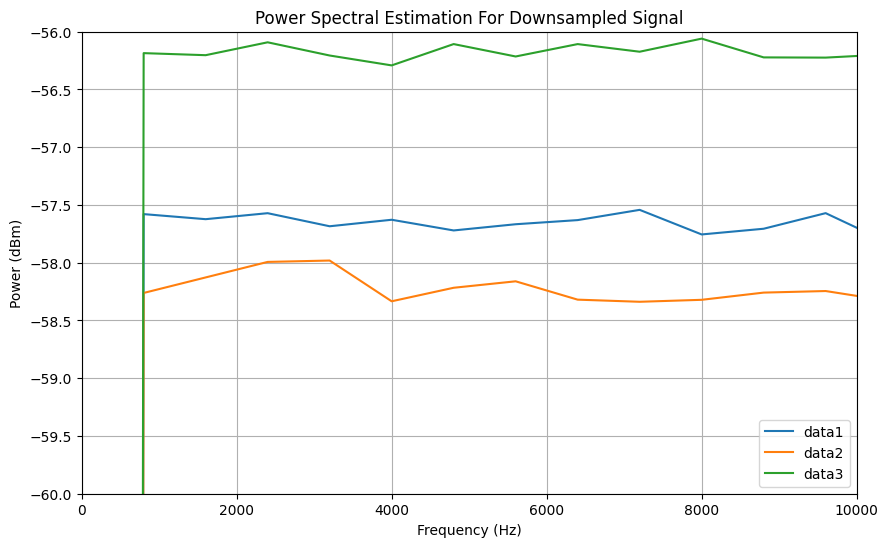

In [128]:
# Plot
yrange = 4
yref = -58
plt.figure(figsize=(10, 6))
plt.plot(f1_down, Pxx_avg1_down, label='data1')
plt.plot(f2_down, Pxx_avg2_down, label='data2')
plt.plot(f3_down, Pxx_avg3_down, label='data3')
plt.title('Power Spectral Estimation For Downsampled Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBm)')
plt.xlim(0,10000)
plt.ylim(yref-yrange/2, yref+yrange/2)
plt.legend()
plt.grid(True)
plt.show()
